<a href="https://colab.research.google.com/github/alinaprolygina/osda/blob/main/NeuralFCA_Big_hw_data2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libs

In [1]:
import sys
print(sys.executable)


/usr/bin/python3


In [2]:
import sys
print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython']


In [3]:
import numpy as np
import pandas as pd

In [4]:
import torch

In [5]:
!pip3 install 'fcapy[all]'
!pip3 install frozendict
!pip3 install ipynb
!pip3 install sparselinear
!pip3 install bitsets
!pip3 install bitarray
import torch
!pip3 install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip3 install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip3 install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip3 install git+https://github.com/pyg-team/pytorch_geometric.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.9/162.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.9/279.9 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.4 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=8b30a65e2cea531bd8b65df79871fc36d9c5a4f1196a81b52a555aae13c7fa16
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=495091 sha256=b4b7bf5cde045b99284fad9d2834a799caa03a8655d4df03e240b1746917c8ea
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch-scatter
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1035675 sha256=7bc3d9f9e7b414ff0c345331aca37a252b40262757ad928986e4d3b117883f72
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
Successfully buil

In [352]:
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice

In [353]:
from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = (1,1,1,1)

In [354]:
import neural_lib as nl

In [478]:
df = pd.read_csv('risk_factors_cervical_cancer.csv', header=0)

columns_to_drop = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs:cervical condylomatosis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:Hepatitis B', 'Dx:CIN', 'STDs:HPV']
df = df.drop(columns=columns_to_drop)

# Count the number of values equal to "?" in each column
missing_value_counts = (df == "?").sum()

# Print the number of values equal to "?" in each column
# print(missing_value_counts)

# Replace "?" with NaN
df.replace('?', np.nan, inplace=True)

# Remove rows with NaN values
df.dropna(inplace=True)

print(df)

# Count the number of values equal to "?" in each column
missing_value_counts = (df == "?").sum()

# Print the number of values equal to "?" in each column
# print(missing_value_counts)

# df["Age"].value_counts().sort_index()

     Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
5     42                       3.0                     23.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Hormonal Contraceptives  IUD STDs  \
0                  1.0    0.0                     0.0  0.0  0.0   
1                  1.0    0.0                     0.0  0.0  0.0   
3                  4.0    1.0             

# Pipeline

# Step 0. Binarize the data

In [479]:
df_bin = df  # Skip this part as the data is already binary

# Converting columns to numeric format
df['Number of sexual partners'] = pd.to_numeric(df['Number of sexual partners'], errors='coerce')
df['First sexual intercourse'] = pd.to_numeric(df['First sexual intercourse'], errors='coerce')
df['Num of pregnancies'] = pd.to_numeric(df['Num of pregnancies'], errors='coerce')

# Binary encoding for 'Age'
df_bin['Age < 31'] = (df['Age'] < 31).astype(int)
df_bin['Age 31-42'] = ((df['Age'] >= 31) & (df['Age'] <= 42)).astype(int)
df_bin['Age > 42'] = (df['Age'] > 42).astype(int)

# Binary encoding for 'Number of sexual partners'
df_bin['Sexual partners < 4'] = (df['Number of sexual partners'] < 4).astype(int)

# Binary encoding for 'First sexual intercourse'
df_bin['First intercourse < 19'] = (df['First sexual intercourse'] < 19).astype(int)

# Binary encoding for 'Num of pregnancies'
df_bin['Pregnancies < 4'] = (df['Num of pregnancies'] < 4).astype(int)

# Binary encoding for 'STDs: Number of diagnosis'
df_bin['STDs diagnosis'] = (df['STDs: Number of diagnosis'] > 0).astype(int)

df_bin.drop(['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'STDs: Number of diagnosis', 'STDs:vaginal condylomatosis', 'Dx'], axis=1, inplace=True)

# Checking the result
print(df_bin.head())

  Smokes Hormonal Contraceptives  IUD STDs STDs:condylomatosis  \
0    0.0                     0.0  0.0  0.0                 0.0   
1    0.0                     0.0  0.0  0.0                 0.0   
3    1.0                     1.0  0.0  0.0                 0.0   
4    0.0                     1.0  0.0  0.0                 0.0   
5    0.0                     0.0  0.0  0.0                 0.0   

  STDs:vulvo-perineal condylomatosis STDs:syphilis STDs:HIV  Dx:Cancer  \
0                                0.0           0.0      0.0          0   
1                                0.0           0.0      0.0          0   
3                                0.0           0.0      0.0          1   
4                                0.0           0.0      0.0          0   
5                                0.0           0.0      0.0          0   

   Dx:HPV  ...  Schiller  Citology  Biopsy  Age < 31  Age 31-42  Age > 42  \
0       0  ...         0         0       0         1          0         0   
1   

Split the data to train and test

In [480]:
# Grouping by columns and counting the number of occurrences for each combination
combinations_count = df.groupby(['Hinselmann', 'Schiller', 'Citology', 'Biopsy']).size().reset_index(name='Count')

# Displaying the results
print(combinations_count)

    Hinselmann  Schiller  Citology  Biopsy  Count
0            0         0         0       0    582
1            0         0         0       1      4
2            0         0         1       0     17
3            0         0         1       1      1
4            0         1         0       0     11
5            0         1         0       1      9
6            0         1         1       0      3
7            0         1         1       1     11
8            1         0         0       0      1
9            1         1         0       0      6
10           1         1         0       1     16
11           1         1         1       0      3
12           1         1         1       1      4


In [481]:
# Function to convert a row to a decimal value
def to_decimal(row):
    # Assign a weight to each column and sum to get the decimal value
    value = row['Hinselmann'] * 8 + row['Schiller'] * 4 + row['Citology'] * 2 + row['Biopsy'] * 1
    return value

# Apply the function to all rows
df_bin['Target'] = df.apply(to_decimal, axis=1)

df_bin.drop(['Hinselmann', 'Schiller', 'Citology', 'Biopsy', 'STDs diagnosis'], axis=1, inplace=True)

for column in df_bin.columns:
    if column != 'Target':
        df_bin[column] = pd.to_numeric(df_bin[column], errors='coerce')


for column in df_bin.columns:
    if column != 'Target':
        df_bin[column] = df_bin[column].replace({1: True, 0: False})

# df_bin = df_bin.replace({1: True, 0: False})

# df_bin["Target"].value_counts().sort_index()

df_bin['Target'] = df_bin['Target'].apply(lambda x: False if x == 0 else True)

# Print the first few rows for verification
df_bin


,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:HIV,Dx:Cancer,Dx:HPV,Age < 31,Age 31-42,Age > 42,Sexual partners < 4,First intercourse < 19,Pregnancies < 4,Target
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,False
3,True,True,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False
854,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False
855,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True
856,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False


In [482]:
# # List of columns to keep
# columns_to_keep = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:HIV', 'Dx:Cancer', 'Dx:HPV', 'Dx', 'Target']

# # Remove all columns except the ones listed
# df_bin = df_bin[columns_to_keep]

# # Print the first few rows to check
# print(df_bin.head())

In [485]:
from sklearn.model_selection import train_test_split

y_feat = 'Target'

# # Total number of rows in the dataset
# total_rows = len(df_bin)

# # Size of the test sample
# test_size = 150

# # Index from which the data will go into the test sample
# test_start_index = total_rows - test_size

# # Split into training and test sets
# df_train = df_bin.iloc[:test_start_index]
# df_test = df_bin.iloc[test_start_index:]

df_train, df_test = train_test_split(df_bin, train_size=0.7, random_state=0)

In [486]:
X_train, y_train = df_train.drop(y_feat, axis=1), df_train[y_feat]
X_test, y_test = df_test.drop(y_feat, axis=1), df_test[y_feat]

In [362]:
!pip install imbalanced-learn

In [618]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# smote = SMOTE(random_state=0)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [619]:
print("Unique class labels in the training set:", y_train.unique())
# Counting the number of samples for each class in the training dataset
class_counts = y_train.value_counts()
print("Class counts in training set:")
print(class_counts)

# Optionally, you can calculate the percentage ratio for each class
class_proportions = class_counts / len(y_train)
print("\nClass proportions in training set:")
print(class_proportions)

Unique class labels in the training set: [ True False]
Class counts in training set:
True     411
False    411
Name: Target, dtype: int64

Class proportions in training set:
True     0.5
False    0.5
Name: Target, dtype: float64


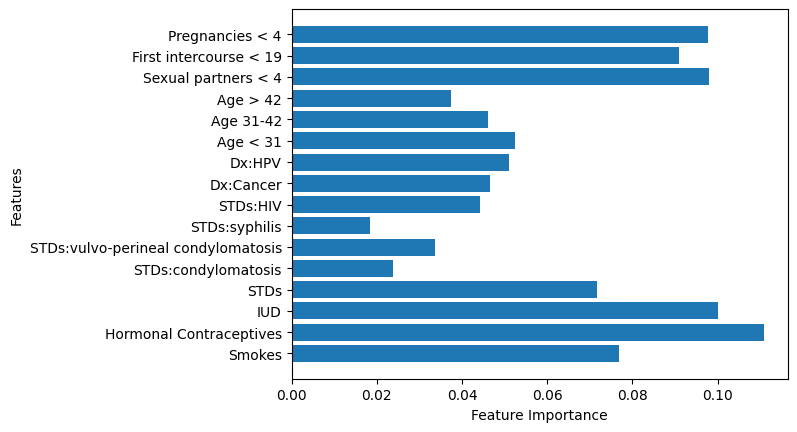

In [620]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Training the random forest to assess the importance of features
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Visualization of feature importances
plt.barh(X_train.columns, rf.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

## Step 1. Build Monotone Concept Lattice

Put binarized data in FormalContext and compute monotone ConceptLattice

In [621]:
# X_train.index = X_train.index.map(str)
# K_train = FormalContext.from_pandas(X_train)
K_train = FormalContext(data=X_train.values, target = y_train.values, attribute_names=X_train.columns)
K_train

FormalContext (822 objects, 16 attributes, 4075 connections)
   |Smokes|Hormonal Contraceptives|IUD|STDs|STDs:condylomatosis|...|Age 31-42|Age > 42|Sexual partners < 4|First intercourse < 19|Pregnancies < 4|
0  |     X|                      X|   |   X|                   |...|        X|        |                  X|                     X|               |
1  |      |                       |   |    |                   |...|         |        |                  X|                      |              X|
2  |      |                       |   |    |                   |...|        X|        |                  X|                      |              X|
3  |      |                      X|   |    |                   |...|         |        |                  X|                     X|              X|
4  |      |                      X|   |    |                   |...|         |        |                  X|                      |              X|
5  |      |                      X|   |   X|             

In [622]:
%%time
L = ConceptLattice.from_context(K_train, algo ='Sofia', is_monotone=True)
len(L)

CPU times: user 545 ms, sys: 2.88 ms, total: 548 ms
Wall time: 552 ms


102

Compute F1 score for each formal concept  (assuming that an object is predicted True if it is in the extent of the concept)

In [623]:
from sklearn.metrics import f1_score
from frozendict import frozendict

for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1

    # Copying and modifying data
    updated_measures = dict(c.measures)
    updated_measures['f1_score'] = f1_score(y_train, y_preds)

    # Updating c.measures with the new frozendict
    c.measures = frozendict(updated_measures)

# for c in L:
#     y_preds = np.zeros(K_train.n_objects)
#     y_preds[list(c.extent_i)] = 1
#     c.measures['f1_score'] = f1_score(y_train, y_preds)

Select indices of the best concepts from the lattice

In [839]:
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:9])

assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

Construct neural network based on concept lattice

In [840]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

Setup visuzalier for the architecture

In [841]:
vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')

Move the nodes in visualization to make it look pretty

In [842]:
# vis.init_mover_per_poset(cn.poset)
# mvr = vis.mover
# for a, b in [(11, 15), (2, 3), (2,8), (2, 4), (4,5), (24, 26), (22, 26), (23, 25), (22, 24), (6, 7), ]:
#     mvr.swap_nodes(a, b)

# for nodes, vert in [
#     ([19, 18], 0), ([23, 22], 5), ([14, 21,20], 1), ([13, 24, 25], 6), ([26], 7), ([9, 15], 8)
# ]:
#     for a in nodes:
#         mvr.place_node(a, mvr.posx[vert])

In [843]:
descr = {'Hormonal Contraceptives', 'STDs', 'Sexual partners < 4'}

traced = cn.trace_description(descr, include_targets=False)

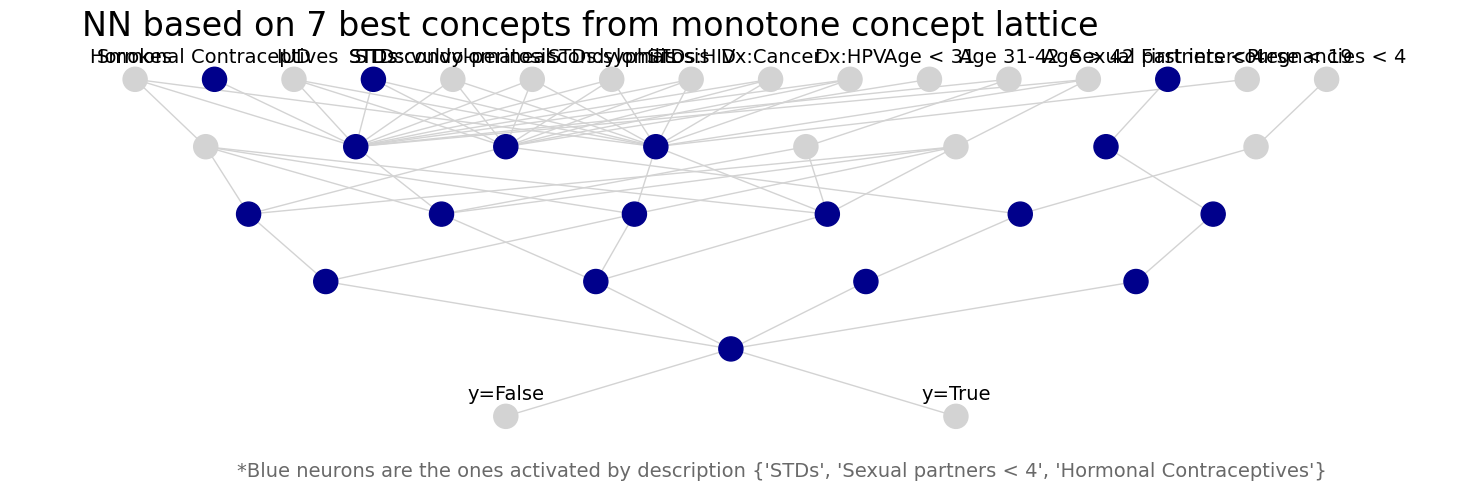

In [844]:
fig, ax = plt.subplots(figsize=(15,5))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))]
)
plt.title(f'NN based on 7 best concepts from monotone concept lattice', loc='left', x=0.05, size=24)

plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3, f'*Blue neurons are the ones activated by description {descr}', fontsize=14, ha='right', color='dimgray')

plt.subplots_adjust()
plt.tight_layout()
plt.show()

Now fit the network

In [845]:
cn.fit(X_train, y_train)

In [846]:
from sklearn.metrics import accuracy_score
# Evaluation on the training set
train_pred = cn.predict(X_train)
print("Accuracy on the training set:", accuracy_score(y_train, train_pred))

# Evaluation on the test set
test_pred = cn.predict(X_test)
print("Accuracy on the test set:", accuracy_score(y_test, test_pred))

Accuracy on the training set: 0.7116788321167883
Accuracy on the test set: 0.6865671641791045


To obtain the prediction

In [847]:
print('Class prediction', cn.predict(X_test).numpy())
print('Class prediction with probabilities', cn.predict_proba(X_test).detach().numpy())
print('True class', y_test.values)

Class prediction [0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1]
Class prediction with probabilities [[8.7419271e-01 1.2580736e-01]
 [8.7419271e-01 1.2580736e-01]
 [8.7419271e-01 1.2580736e-01]
 [8.7419271e-01 1.2580736e-01]
 [8.7419271e-01 1.2580736e-01]
 [8.7419271e-01 1.2580736e-01]
 [8.7419271e-01 1.2580736e-01]
 [8.7419271e-01 1.2580736e-01]
 [2.8996149e-01 7.1003848e-01]
 [8.7419271e-01 1.2580736e-01]
 [8.7419271e-01 1.2580736e-01]
 [8.7419271e-01 1.2580736e-01]
 [8.7419271e-01 1.2580736e-01]
 [4.1815045e-01 5.8184952e-01]
 [8.7419271e-01 1.2580736e-01]
 [8.7419271e-01 1.2580736e-01]
 [2.8996149e-01 7.1003848e-01]
 [8.7419271

In [848]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = cn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.6865671641791045, Precision: 0.17647058823529413, Recall: 0.3, F1 Score: 0.22222222222222224


Let us look at the fitted weights of edges

In [849]:
edge_weights = cn.edge_weights_from_network()

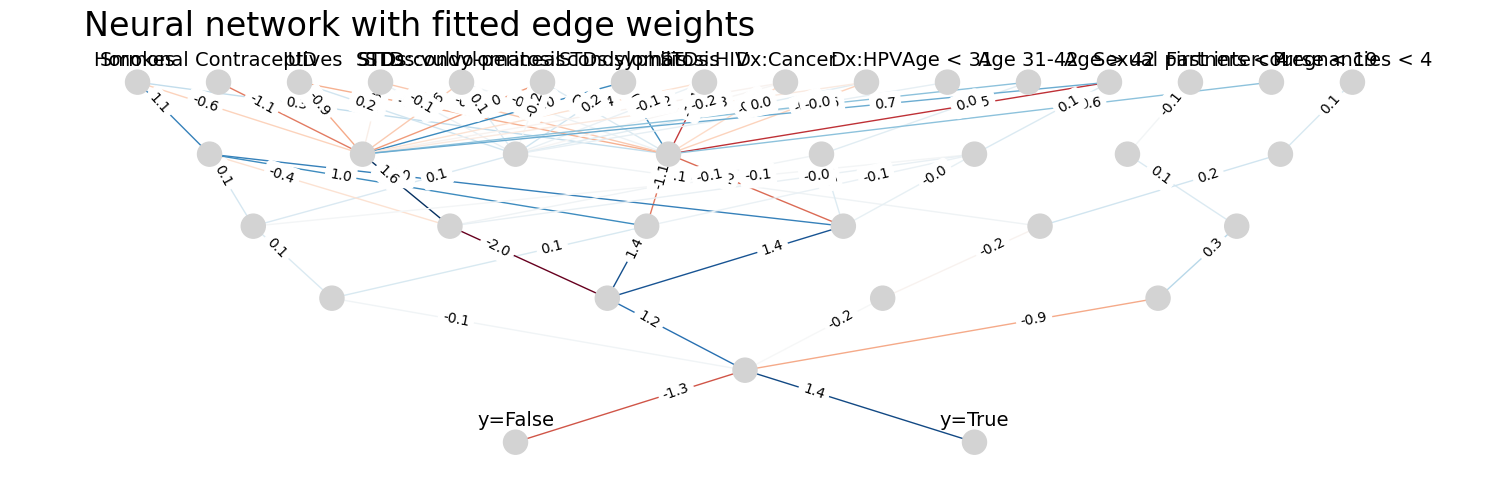

In [850]:
import networkx as nx

fig, ax = plt.subplots(figsize=(15,5))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('fitted_network2.png')
plt.show()